## Факторний аналіз 

Більше можна почитати [тут](https://www.earthinversion.com/geophysics/exploratory-factor-analysis/).   Але в коді є проблема, див. [тут](https://stackoverflow.com/questions/60411978/attributeerror-factoranalyzer-object-has-no-attribute-analyze). Якщо не встановлено пакет  factor_analyzer, то встановлюємо. 

https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [5]:
# ! pip install factor_analyzer

In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
import seaborn as sns

In [4]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

### Приклад 1. 
В наступній табліиці наведено дані тестування типу особистості. Є 5 типів (колонки названі відповідно до першої літери:  Agreeableness, Conscientiousness, Extraversion, Neuroticism, and Openness),по 5 підтипів в кожній. Кожна змінна -це оцінка в шкалі від 1 до 6:  1 Very Inaccurate; 2 Moderately Inaccurate; 3 Slightly Inaccurate; 4 Slightly Accurate; 5 Moderately Accurate; 6 Very Accurate.

In [6]:
df1= pd.read_csv("bfi.csv")
df1.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


Відкинемо останні 3 колонки. 

In [7]:
df1.drop(['gender', 'education', 'age'],axis = 1,inplace=True)
df1.dropna(inplace=True)
df1.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Почнемо з теста сферичності Бартлетта, за допомогою якого ми перевіряємо, ци є змінні некорельованими. Якщо так (тобто нульова гіпотеза про те, що матриця діагональна, справедлива), то нема потреби проводити факторний аналіз. 

Тест Бартлетта: нехай $R$- кореляційна матриця, 
$$
b= - (n-1 - \frac{2p+5}{6})\ln |R|. 
$$
Припустимо, що гіпотеза $H_0$ має місце. Тоді при великих $n$ статистика наближено має розподіл  $\chi^2_{\frac{p(p-1)}{2}}$: 
	$$
	b\sim \chi^2_{\frac{p(p-1)}{2}}.
	$$ 

In [8]:
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(18146.06557723504, 0.0)

Альтернативно, можна використати тест Kaiser–Meyer–Olkin (KMO), який дає змогу перевірити, наскільки дані підходять для того, щоб використати факторний аналіз. Відповідна статистика вимірює пропорцію дисперсії  серед змінніх, які можуть мати спільну дисперсію. Чим ближче це значення до 1, тим краще. Більше 0.8 вважається достатньо. Менше, ніж 0.5 - погано. 

Kaiser–Meyer–Olkin criterion: 
$$
KMO:=\frac{\sum_{j\neq k}  r_{jk}^{2}}{\sum_{j\neq k} r_{jk}^{2}+\sum_{j\neq k} p_{jk}^{2}}
$$
$r_{jk}$- кореляція між $i$-ю та  $j$-ю змінною, та 
$p_{jk}$ is the partial correlation: 
$$
p_{ij} = \frac{r_{ij} - r_{iC} r_{jC}}{\sqrt{(1-r^2_{iC})}\sqrt{(1-r^2_{jC})}}
$$
де $r_{ik}$ -- кореляція $i$-ї змінної та вектору  $C$ (всіх інших змінніх, крім $i$ та $j$)   

https://en.wikipedia.org/wiki/Kaiser%E2%80%93Meyer%E2%80%93Olkin_test#cite_note-Factor-4

In [10]:
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model

0.8486452309468394

Отже, нульова гіпотеза про сферичність не виконана, проводимо факторний аналіз.  Задамо модель: 
$$
y - \mu = \Lambda f + \mathcal{E}. 
$$
Нам потрібно підібрати фактори $f$ і матрицю $\Lambda$.

In [12]:
fa = FactorAnalyzer()
fa.fit(df1)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Насправді, це власні числа кореляційної матриці, а не коваріаційної: 

In [97]:
R = np.corrcoef(df1.T)
np.linalg.eigvals(R)[:6]

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247])

Перші 6 значень- більше 1.  Щоб обрати достатню кількість власних чисел, що пояснює дисперсію, зродимо scree plot. 

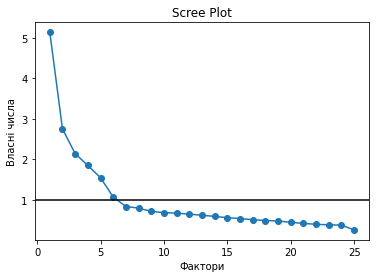

In [88]:
plt.scatter(range(1,df1.shape[1]+1),eigen_values)
plt.plot(range(1,df1.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Фактори')
plt.ylabel('Власні числа')
plt.axhline(y=1,c='k')

Отже, 6 власних чисел має бути досить. Знайдемо тепер 6 факторів. Причому можна застосувати поворот факторів. Наприклад, за допомогою **varimax**: шукаємо таку  матрицю $T$, яка б максимізувала    таку різницю моментів: 
$$
\frac1p \sum_{j=1}^k \sum_{i=1}^p (\Lambda T)_{ij}^4 - \sum_{j=1}^k \left(\frac1p \sum_{i=1}^p (\Lambda T)_{ij}^2 \right)^2\Longrightarrow  \max.
$$
(це метод Кайзера) 
Фактично, ми при цьому змінюємо базис, та знаходимо нову матрицю навантажень $\Lambda$. Елементи цієї матриці називаються loadings. 

В результати ми отримали  $\Lambda^* = \Lambda T$, де матриця  $T$ є ортогональною та такою, що максимізує дисперсії  навантажень в кожному стовбчику матриці  $\Lambda^*$.
Зауважимо, що при цьому середні дисперсії не змінюються: ортогональне перетворення не змінює власні числа. 

In [105]:
fa.set_params(n_factors=6, rotation='varimax')
fa.fit(df1)
corr = fa.corr_
loadings = fa.loadings_   # eigenvectors 
print(loadings)

[[ 9.52197424e-02  4.07831579e-02  4.87338849e-02 -5.30987347e-01
  -1.13057329e-01  1.61216354e-01]
 [ 3.31312757e-02  2.35538039e-01  1.33714395e-01  6.61140974e-01
   6.37337876e-02 -6.24353685e-03]
 [-9.62088395e-03  3.43008171e-01  1.21353367e-01  6.05932697e-01
   3.39902659e-02  1.60106427e-01]
 [-8.15175586e-02  2.19716719e-01  2.35139532e-01  4.04594040e-01
  -1.25338019e-01  8.63557032e-02]
 [-1.49615885e-01  4.14457672e-01  1.06382165e-01  4.69698292e-01
   3.09765733e-02  2.36519343e-01]
 [-4.35840220e-03  7.72477518e-02  5.54582254e-01  7.51069668e-03
   1.90123730e-01  9.50350462e-02]
 [ 6.83300836e-02  3.83703832e-02  6.74545448e-01  5.70549885e-02
   8.75925919e-02  1.52775079e-01]
 [-3.99936733e-02  3.18673000e-02  5.51164439e-01  1.01282241e-01
  -1.13380872e-02  8.99628409e-03]
 [ 2.16283366e-01 -6.62407747e-02 -6.38475488e-01 -1.02616939e-01
  -1.43846474e-01  3.18358896e-01]
 [ 2.84187245e-01 -1.80811697e-01 -5.44837677e-01 -5.99548221e-02
   2.58370946e-02  1.3242

Власні числа: 

original_eigen_values (numpy.ndarray) – The original eigenvalues

common_factor_eigen_values (numpy.ndarray) – The common factor eigenvalues


In [106]:
fa.get_eigenvalues()

(array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
        1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
        0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
        0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
        0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902]),
 array([ 4.62151801,  2.28722512,  1.58418949,  1.24487285,  0.99295601,
         0.52056474,  0.25772607,  0.20470979,  0.12171439,  0.10335508,
         0.07351889,  0.04212905,  0.03273147,  0.0170855 , -0.00983342,
        -0.03318659, -0.04583048, -0.04895868, -0.06093545, -0.07926602,
        -0.0859421 , -0.09982342, -0.11016681, -0.12563658, -0.15339095]))

Тепер з'ясуємо, які змінні входять в який фактор. Для зручності ми  трохи переформатуємо таблицю. 

In [89]:
names = df1.loc['A1': 'O5']

In [90]:
df2 = pd.DataFrame.from_records(loadings, columns=['F1','F2','F3','F4', 'F5', 'F6'], index =[i  for i in names])
df2.head()

,F1,F2,F3,F4,F5,F6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519


Тепер зобразимо графічно, який змінні входять в який фактор.  Див [тут](https://medium.com/swlh/factor-analysis-characterising-companies-based-on-financial-metrics-3d5fcc4e8b6f). 

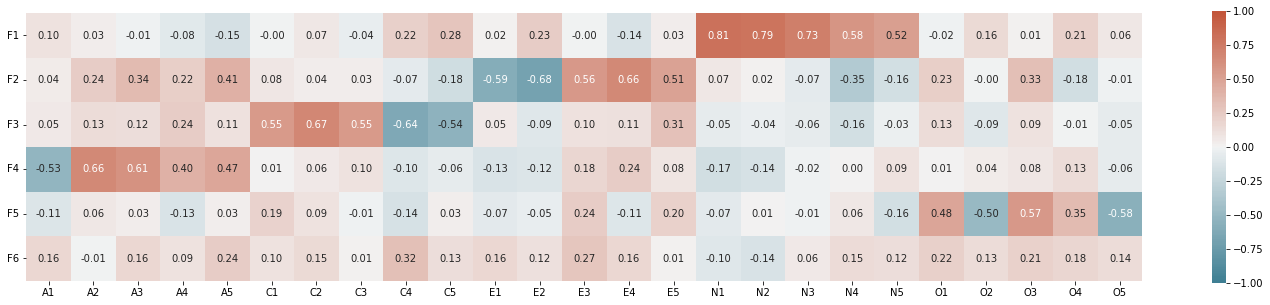

In [24]:
plt.figure(figsize=(25,5))

# plot the heatmap for correlation matrix
ax = sns.heatmap(df2.T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

Наприклад, фактор 4 (F4) формується за допомоги змінних А1--А5, причому А1 і А2--А5 мають протилежний вплив. 

Отримаємо ще наступну інформацію про модель. По-перше, отримаємо дисперсії навантажень (factor variances). 

In [26]:
np.round(fa.get_factor_variance(),2)

array([[2.73, 2.6 , 2.07, 1.71, 1.5 , 0.63],
       [0.11, 0.1 , 0.08, 0.07, 0.06, 0.03],
       [0.11, 0.21, 0.3 , 0.36, 0.42, 0.45]])

Насправді, значення в цьому масиві мають наступний сенс:

In [73]:
variances = np.round(fa.get_factor_variance(),4) 

df3 = pd.DataFrame.from_records(variances, columns=['F1','F2','F3','F4', 'F5', 'F6'], \
                                index = {'SS loadings', 'Proportional Vars', 'Cumulative Vars'})
df3.head()

,F1,F2,F3,F4,F5,F6
Cumulative Vars,2.7270,2.6022,2.0735,1.7135,1.5048,0.6303
SS loadings,0.1091,0.1041,0.0829,0.0685,0.0602,0.0252
Proportional Vars,0.1091,0.2132,0.2961,0.3646,0.4248,0.4501


Cumulative Vars-- це сума квадратів величин, що у стовбчиках, що відповідають $Fi$: 
$$
Cumulative Vars = \sum_{i=1}^{25} \lambda_{ij}^2. 
$$

In [75]:
print(np.sum(loadings**2, axis = 0))

[2.7269887  2.602239   2.07347064 1.7134991  1.50483135 0.63029714]


(тут це не те саме, що власні числа, тому що власні вектори не нормовані! В лекції використовувалось те, що власні вектори нормовані, в пакеті- це не так).

SS loadings: це пропорція CumulativeVars, що відповідають першим 6ти власним векторам, до кількості координат, тобто до 25. 

In [76]:
print(np.sum(loadings**2, axis = 0)/25)

[0.10907955 0.10408956 0.08293883 0.06853996 0.06019325 0.02521189]


Proportional vars: відповідно, кумулятивна сума. Тобто, наприклад, 

In [77]:
SS = np.sum(loadings**2, axis = 0)/25
print(SS[0]+ SS[1])

0.21316910794459665


Як ми бачимо, 6 факторів пояснюють $45\%$ дисперсії.  Отримаємо тепер частки спільної дисперсії, яка пояснена факторами (communalities)
$$
\hat{h}_i^2 = \sum_{j=1}^6 \hat{\lambda}_{ij}^2, \quad  i = 1, \dots,25. 
$$

In [18]:
np.round(fa.get_communalities(),2)

array([0.33, 0.52, 0.53, 0.3 , 0.48, 0.36, 0.5 , 0.32, 0.59, 0.43, 0.4 ,
       0.56, 0.48, 0.56, 0.4 , 0.7 , 0.67, 0.54, 0.51, 0.35, 0.35, 0.3 ,
       0.49, 0.25, 0.36])

In [57]:
print(np.sum(loadings**2, axis = 1))

[0.33382529 0.51566375 0.52641765 0.29707441 0.48299467 0.35878279
 0.49542081 0.31686484 0.59139171 0.43210146 0.39874554 0.55999664
 0.48248334 0.56004368 0.40138104 0.70203777 0.66528024 0.5379306
 0.50555798 0.3491531  0.34667054 0.29854403 0.4860021  0.24612269
 0.36083927]


І у вигляді табдлиці:

In [19]:
communalities = np.round(fa.get_communalities(),2).reshape(25,1)

df4 = pd.DataFrame.from_records(communalities, columns = ['h2'], index = [i for i in names])
df4.head()

,h2
A1,0.33
A2,0.52
A3,0.53
A4,0.30
A5,0.48


Як ми бачимо, значення суттєво менші за 1, отже,фактори погано пояснюють модель. 